# UAV Placement Optimization Example

This notebook reproduces the example script that demonstrates how to use the `uav_placement` package to optimize UAV base station placement.

In [2]:
# Import required libraries
from uav_placement import UAVPlacementOptimizer

In [3]:
# Create optimizer
optimizer = UAVPlacementOptimizer()

In [4]:
# Run optimization with custom parameters
print('Running optimization...')
results = optimizer.optimize(
    num_base_stations=3,
    num_mobile_users=30,
    region_size=7.0,
    bs_powers_dbm=[7, 9, 12],  # Different power levels
    num_iterations=50,
    optimization_method='stochastic',
    utility_function='sigmoid',
    random_seed=42  # For reproducibility
)
print('Optimization completed!')
print(f"Method: {results['optimization_method']}")
print(f"Final utility: {results['results']['final_utility']:.4f}")
print(f"Converged: {results['results']['converged']}")
print('Optimal base station positions:')
for bs_id, pos in results['results']['final_bs_positions'].items():
    print(f"  {bs_id}: ({pos['x_km']:.3f}, {pos['y_km']:.3f}) km, Power: {pos['power_dbm']:.1f} dBm")

Running optimization...
Running stochastic optimization with 3 BSs and 30 MUs...
Starting optimization with 3 BSs and 30 MUs for 50 steps
Step 0: Avg utility = 1.0000, Gradient norm = 0.0000
Step 5: Avg utility = 1.0000, Gradient norm = 0.0000
Step 10: Avg utility = 1.0000, Gradient norm = 0.0000
Step 15: Avg utility = 1.0000, Gradient norm = 0.0000
Step 20: Avg utility = 1.0000, Gradient norm = 0.0000
Step 25: Avg utility = 1.0000, Gradient norm = 0.0000
Step 30: Avg utility = 1.0000, Gradient norm = 0.0000
Step 35: Avg utility = 1.0000, Gradient norm = 0.0000
Step 40: Avg utility = 1.0000, Gradient norm = 0.0000
Step 45: Avg utility = 1.0000, Gradient norm = 0.0000
Optimization completed!
Method: stochastic
Final utility: 1.0000
Converged: True
Optimal base station positions:
  bs_1: (0.907, 0.633) km, Power: 7.0 dBm
  bs_2: (1.934, 0.832) km, Power: 9.0 dBm
  bs_3: (0.656, 1.266) km, Power: 12.0 dBm


In [ ]:
# Save results
optimizer.save_results('optimization_results.json')
print('Results saved to optimization_results.json')

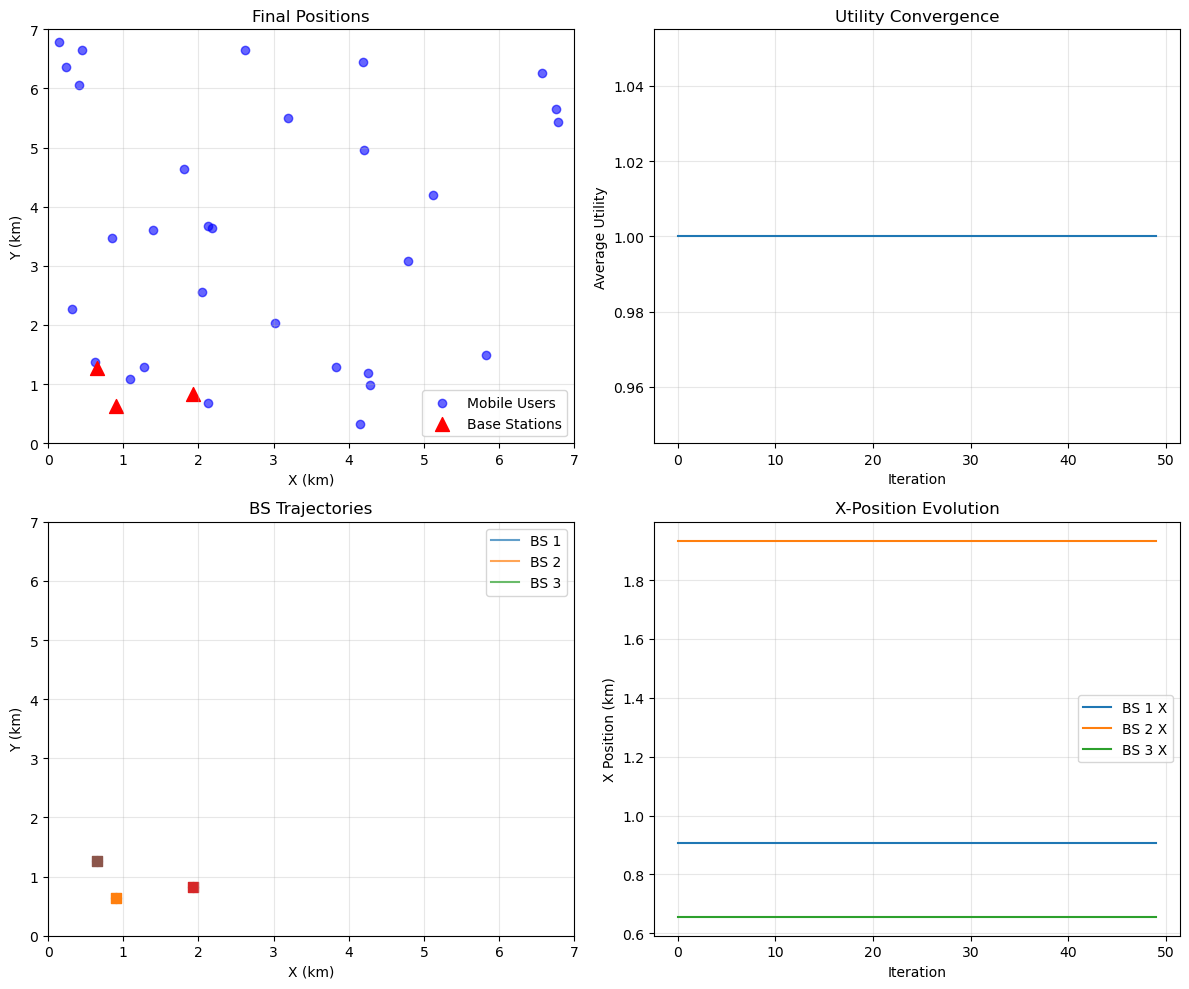

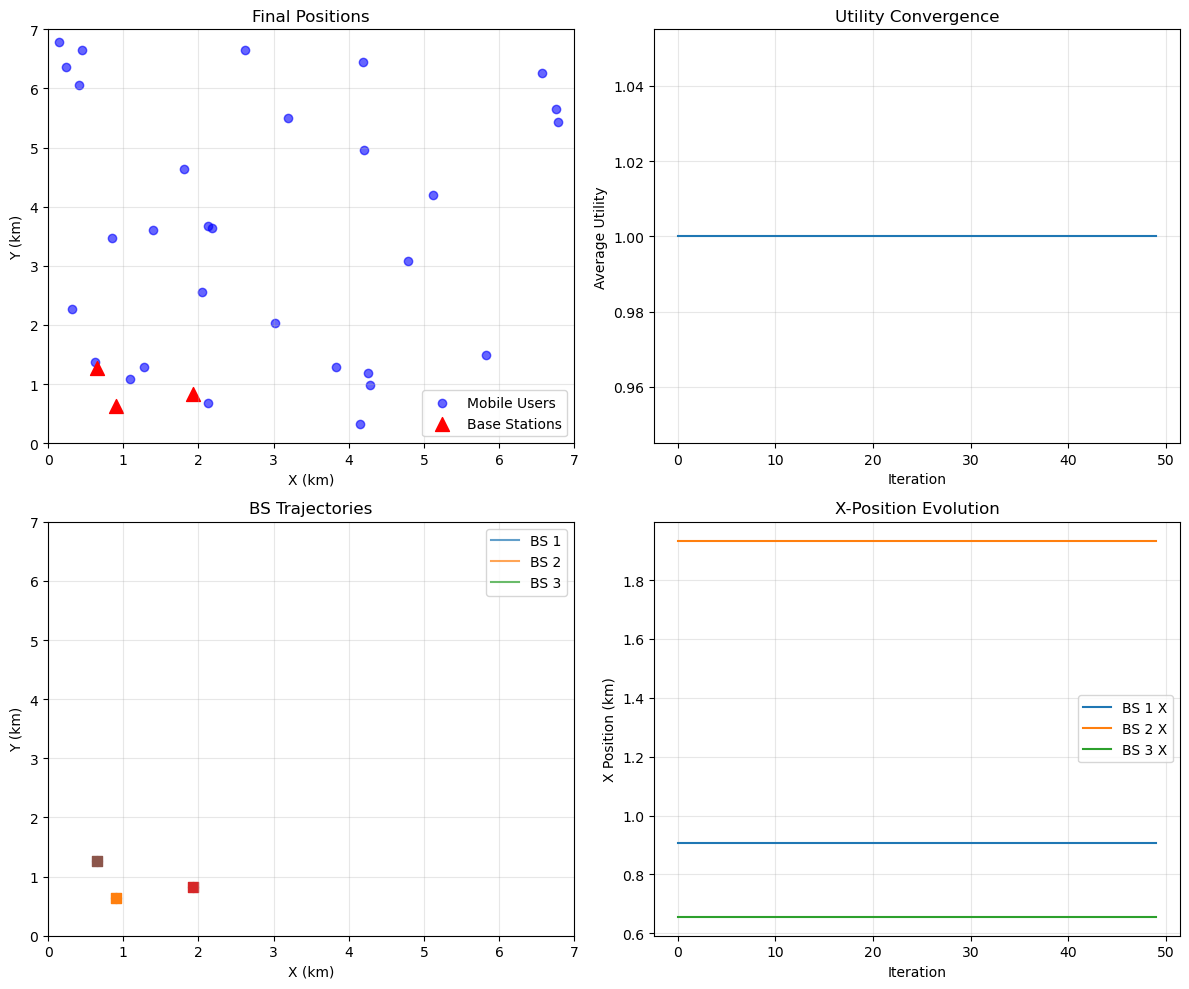

In [6]:
# Create and display plot (do not save)
from IPython.display import display
fig = optimizer.plot_results(save_path=None)
display(fig)

In [ ]:
# Quick comparison with k-means
print('Comparing with k-means optimization...')
results_kmeans = UAVPlacementOptimizer.quick_optimize(
    num_base_stations=3,
    num_mobile_users=30,
    region_size=7.0,
    num_iterations=50
)
print(f"Stochastic final utility: {results['results']['final_utility']:.4f}")
print(f"K-means final utility: {results_kmeans['results']['final_utility']:.4f}")